In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = 'C:/Users/Muaaz/oct/oct2017/OCT2017_/train/'
test_path = 'C:/Users/Muaaz/oct/oct2017/OCT2017_/test/'
validation_path = 'C:/Users/Muaaz/oct/oct2017/OCT2017_/val/'

the numbers of images in CNV class :  37205
(496, 512)


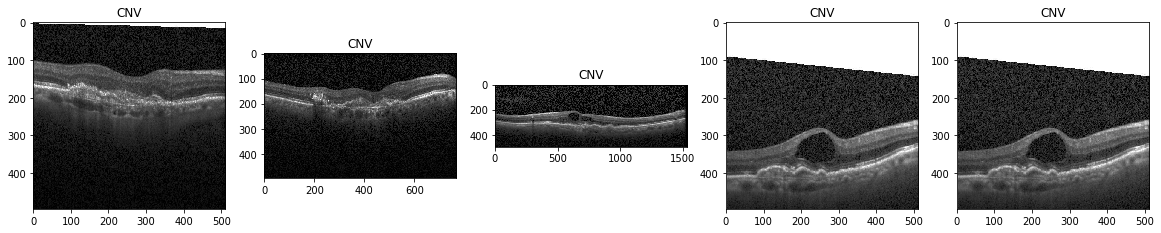

the numbers of images in DME class :  11348
(496, 512)


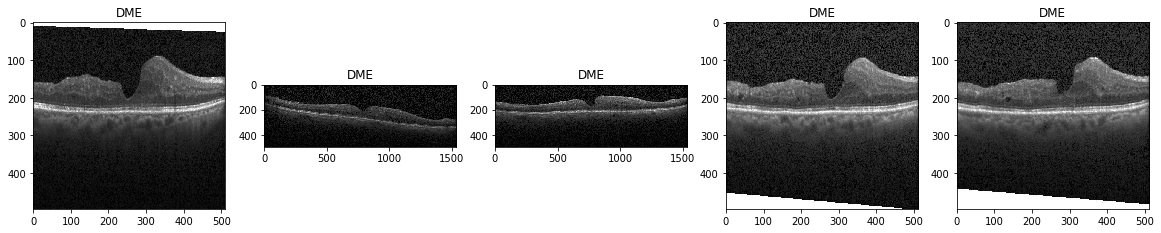

the numbers of images in DRUSEN class :  8616
(496, 512)


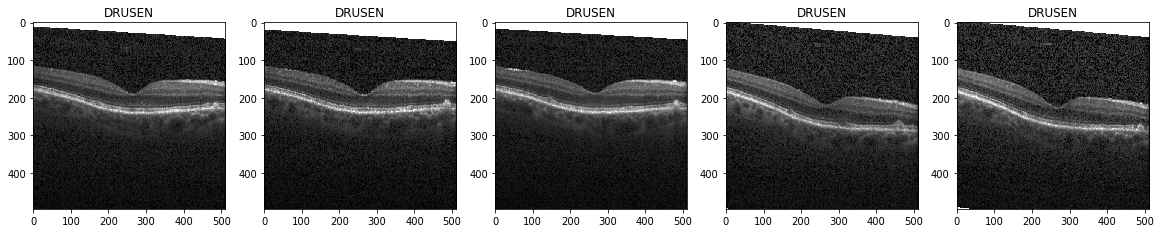

the numbers of images in NORMAL class :  26315
(496, 512)


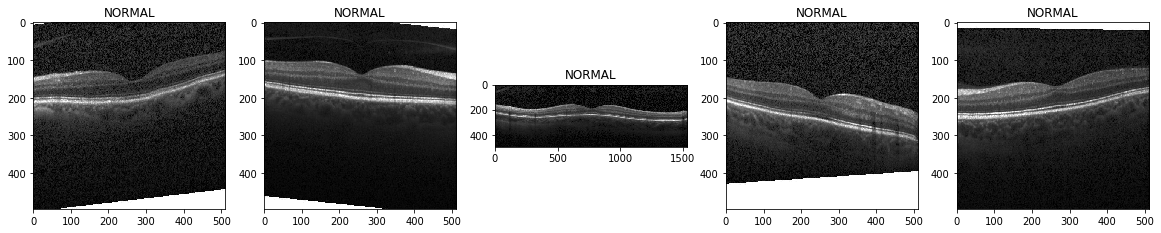

In [3]:
trainClass=os.listdir(train_path)
for i in range(len(trainClass)):
    imageInfile=[]
    imageInfile=os.listdir(os.path.join(train_path,trainClass[i]))
    print( f"the numbers of images in {trainClass[i]} class : " , len(imageInfile))
    plt.figure(figsize=(20,20))
    for j in range(5):
        
        plt.subplot(1,5,j+1)
        image=plt.imread(os.path.join(os.path.join(train_path,trainClass[i]),imageInfile[j]))
        plt.title(trainClass[i])
        plt.imshow(image,cmap='gray')
    print(image.shape)
    plt.show()

In [4]:
imageDelegate = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    
    )

In [5]:
ImageSize = 224
trainGenerator=imageDelegate.flow_from_directory(
    train_path,
    batch_size=100,
    target_size=(ImageSize,ImageSize)  
)

testGenerator =imageDelegate.flow_from_directory(
     test_path,
     batch_size= 10,
     target_size=(ImageSize, ImageSize)
)

validationGenerator =imageDelegate.flow_from_directory(
     validation_path,
     batch_size=4,
     target_size=(ImageSize, ImageSize)
)

Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [6]:
# Check images dimensions
print(trainGenerator.__getitem__(0)[0][1].shape)
print(testGenerator.__getitem__(0)[0][1].shape)
print(validationGenerator.__getitem__(0)[0][1].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [7]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten ,Dropout , Dense  ,Conv2D , MaxPooling2D ,BatchNormalization , Activation

In [8]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
#                  input_shape = (ImageSize, ImageSize, 3)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
#                  input_shape = (ImageSize, ImageSize, 3)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # Block #2: second CONV => RELU => CONV => RELU => POOL
# # layer set
# model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # Block #3: third CONV => RELU => CONV => RELU => POOL
# # layer set
# model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # Block #4: third CONV => RELU => CONV => RELU => POOL
# # layer set
# model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # Block #5: first set of FC => RELU layers
# model.add(Flatten())
# model.add(Dense(64, kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Block #6: second set of FC => RELU layers
# model.add(Dense(64, kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Block #7: softmax classifier
# model.add(Dense(4, kernel_initializer="he_normal"))
# model.add(Activation("softmax"))

# print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0

In [25]:
# from keras.optimizers import RMSprop, SGD, Adam
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint("C:/Users/Muaaz/OCT-GP.h5",
#                              monitor="val_loss",
#                              mode="min",
#                              save_best_only = True,
#                              verbose=1)

# my_callback_es = EarlyStopping(monitor = 'val_loss', 
#                           min_delta = 0, 
#                           patience = 3,
#                           verbose = 1,
#                           restore_best_weights = True)

# my_callback_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# model.compile(optimizer = Adam(lr=0.001), 
#               loss = 'categorical_crossentropy', 
#               metrics = ['accuracy']
#              )

In [ ]:
# epochs=5
# history = model.fit_generator(trainGenerator, epochs=epochs, steps_per_epoch=835, 
#                               callbacks = [my_callback_es, my_callback_rlr, checkpoint]
#                               , validation_data=validationGenerator ,validation_steps=32/4 ,verbose=1 )
# #validation_steps = no. of valid. samples / batch size

In [ ]:
# model.save('C:/Users/Muaaz/OCT-GP.h5')

In [8]:
from tensorflow.keras.applications.densenet  import DenseNet169

preTrainedModelDenseNet169 = DenseNet169(input_shape =( ImageSize, ImageSize, 3), include_top = False,
                                        weights = "imagenet")


for layer in preTrainedModelDenseNet169.layers:
    layer.trainable = False  
preTrainedModelDenseNet169.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [9]:
from tensorflow.keras import Model
#DenseNet169 Model
x=Flatten()(preTrainedModelDenseNet169.output)

#Fully Connection Layers
# FC1
x=Dense(1024, activation="relu")(x)
x=BatchNormalization()(x)
x=Dense(512, activation="relu")(x)
#Dropout to avoid overfitting effect
x=Dropout(0.2)(x)
# FC2
x=Dense(256, activation="relu")(x)
x=Dense(128, activation="relu")(x)


#output layer
x=Dense(4,activation="sigmoid")(x)


modelDenesNet=Model(preTrainedModelDenseNet169.input,x)
modelDenesNet.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

dense_4 (Dense)                 (None, 4)            516         dense_3[0][0]                    
Total params: 96,830,404
Trainable params: 84,185,476
Non-trainable params: 12,644,928
__________________________________________________________________________________________________


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.491296 to fit



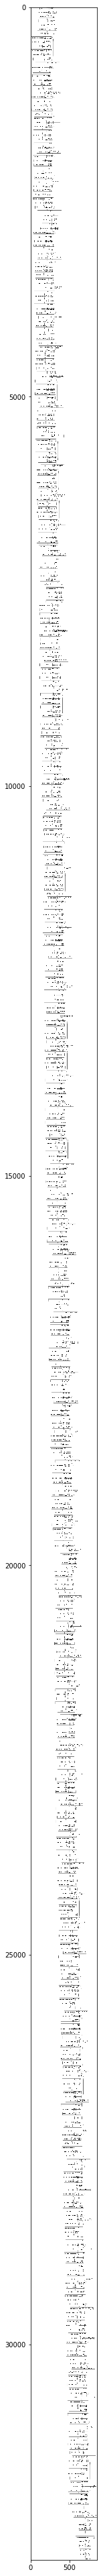

In [10]:
%matplotlib inline
import matplotlib.image as mpimg
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot

plot_model(modelDenesNet, to_file='C:/Users/Muaaz/Desktop/MyModel.png', show_shapes = True, show_layer_names = True)
img = mpimg.imread('C:/Users/Muaaz/Desktop/MyModel.png')
plt.figure(figsize = (100,70))
imgplot = plt.imshow(img)

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
#Optimzation
modelDenesNet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

epochs= 3
checkpoint = ModelCheckpoint("C:/Users/Muaaz/OCT-DenseNetModel.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

my_callback_es = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

my_callback_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

#Fit model  """83484/50=1670 steps_per_epoch=the number of image /batch size"""
history=modelDenesNet.fit_generator(trainGenerator,
                                    epochs=epochs,
                                    steps_per_epoch=835,
                                    callbacks = [my_callback_es, my_callback_rlr, checkpoint],
                                    validation_data=validationGenerator ,
                                    validation_steps=8,
                                    verbose=1 )

Epoch 1/3
835/835 [==============================] - ETA: 0s - loss: 0.3361 - accuracy: 0.8811
Epoch 00001: val_loss improved from inf to 0.40246, saving model to C:/Users/Muaaz\OCT-DenseNetModel.h5
835/835 [==============================] - 5224s 6s/step - loss: 0.3361 - accuracy: 0.8811 - val_loss: 0.4025 - val_accuracy: 0.8438
Epoch 2/3
835/835 [==============================] - ETA: 0s - loss: 0.2384 - accuracy: 0.9153
Epoch 00002: val_loss improved from 0.40246 to 0.22450, saving model to C:/Users/Muaaz\OCT-DenseNetModel.h5
835/835 [==============================] - 5228s 6s/step - loss: 0.2384 - accuracy: 0.9153 - val_loss: 0.2245 - val_accuracy: 0.9062
Epoch 3/3
835/835 [==============================] - ETA: 0s - loss: 0.2003 - accuracy: 0.9289
Epoch 00003: val_loss improved from 0.22450 to 0.19540, saving model to C:/Users/Muaaz\OCT-DenseNetModel.h5
835/835 [==============================] - 5116s 6s/step - loss: 0.2003 - accuracy: 0.9289 - val_loss: 0.1954 - val_accuracy: 0.9

In [13]:
preds = modelDenesNet.evaluate(testGenerator)

97/97 [==============================] - 64s 665ms/step - loss: 0.0814 - accuracy: 0.9783


In [15]:
preds[1]*100

97.83057570457458

- the Accuracy and Loss for DenesNet169 Model With 4 Epochs


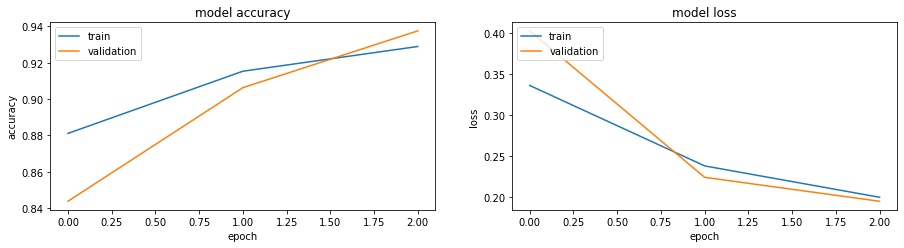

In [16]:
print("- the Accuracy and Loss for DenesNet169 Model With 4 Epochs")
plt.figure(figsize=(40,20))
# summarize history for accuracy
plt.subplot(5,5,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')



# summarize history for loss
plt.subplot(5,5,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()